In [3]:
pip install plotly

^C
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.7 MB 2.2 MB/s eta 0:00:07
   - -------------------------------------- 0.5/15.7 MB 5.4 MB/s eta 0:00:03
   -- ------------------------------------- 1.2/15.7 MB 8.1 MB/s eta 0:00:02
   ----- ---------------------------------- 2.0/15.7 MB 10.8 MB/s eta 0:00:02
   ------- -------------------------------- 2.9/15.7 MB 12.1 MB/s eta 0:00:02
   --------- ------------------------------ 3.9/15.7 MB 13.6 MB/s eta 0:00:01
   ------------ --------------------------- 5.0/15.7 MB 15.1 MB/s eta 0:00:01
   --------------- ------------------------ 6.3/15.7 MB 16.7 MB/s eta 0:00:01
   ------------------- -------------------- 7.6/15.7 MB 17.9 MB/s eta 0:00:01
   ---------------------- ----------------- 8.8/15.7 MB 18.8 MB/s eta 0:00:01
   -----------

In [60]:
pip install imblearn


   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/257.7 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 3.9 MB/s eta 0:00:00


In [9]:
import os
#import jovian
import matplotlib
#import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [14]:
df=pd.read_csv('Cobined_Flight_Weather.csv',index_col=[0])

In [15]:
df.head()

,FlightDate,Quarter,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport_code
0,2016-01-01,1,2016,1,SEA,JFK,1,741.0,0.0,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
1,2016-01-02,1,2016,1,SEA,JFK,2,737.0,0.0,745,...,1024,0,24,8,36,32,64,2016-01-02,700,SEA
2,2016-01-03,1,2016,1,SEA,JFK,3,743.0,0.0,745,...,1018,0,20,7,32,28,62,2016-01-03,700,SEA
3,2016-01-04,1,2016,1,SEA,JFK,4,737.0,0.0,745,...,1010,97,32,8,34,31,95,2016-01-04,700,SEA
4,2016-01-05,1,2016,1,SEA,JFK,5,708.0,0.0,710,...,1001,100,35,10,38,35,91,2016-01-05,700,SEA


<Axes: xlabel='ArrDel15', ylabel='Count'>

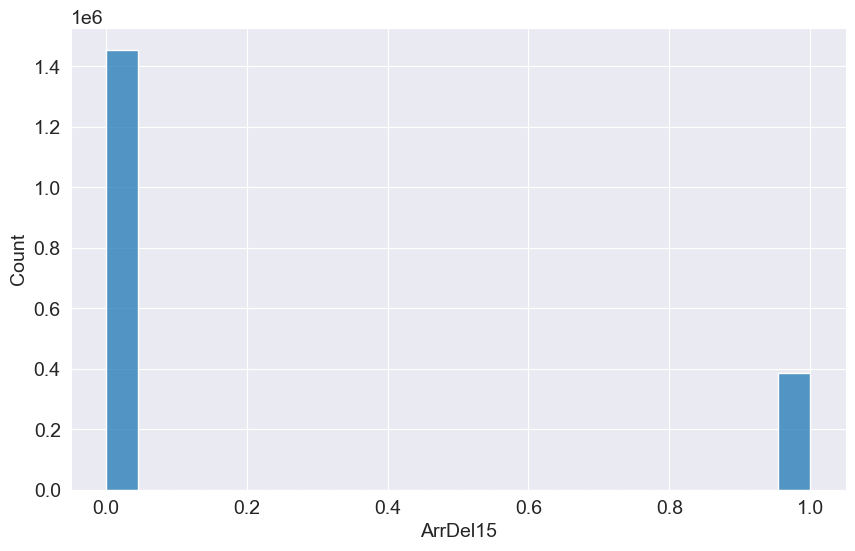

In [9]:
sns.histplot(data=df, x='ArrDel15')

In [ ]:
#df = df.drop(columns = ['airport_code','rounded_time','date','FlightDate','OriginAirportID', 'DestAirportID','WindChillF', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'time', 'Quarter'])

In [18]:
pip install -U seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import seaborn as sns

Text(0.5, 1.0, 'Delay Probability by Origin')

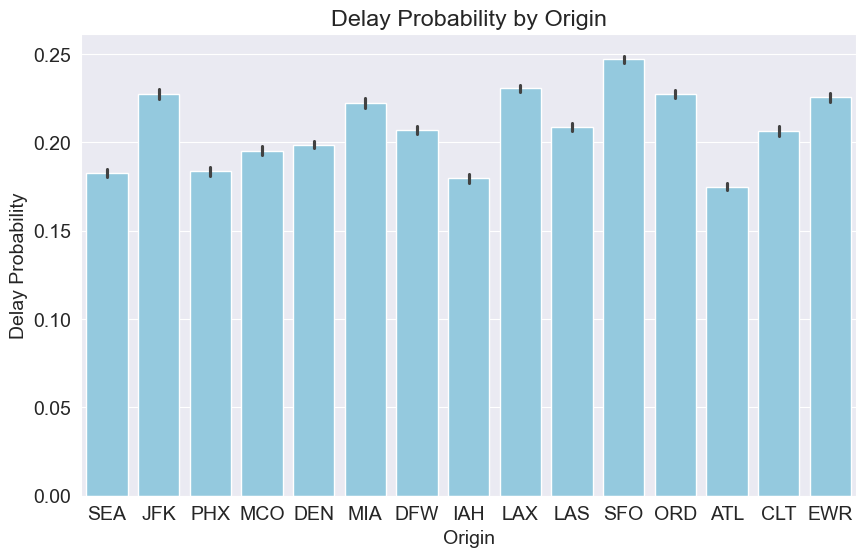

In [15]:
sns.barplot(x = 'Origin', y = 'ArrDel15', data = df,color='skyblue')
plt.ylabel('Delay Probability')
plt.title('Delay Probability by Origin')

In [16]:
df['ArrDel15']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1840269    0.0
1840270    0.0
1840271    0.0
1840272    0.0
1840273    0.0
Name: ArrDel15, Length: 1840274, dtype: float64

In [17]:
df.columns

Index(['FlightDate', 'Quarter', 'Year', 'Month', 'Origin', 'Dest',
       'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'rounded_time', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity', 'date',
       'time', 'airport_code'],
      dtype='object')

In [18]:
df = df.drop(columns = ['airport_code','rounded_time','date','FlightDate','OriginAirportID', 'DestAirportID','WindChillF', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'time', 'Quarter'])

In [19]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df["Origin"] = labelEncoder.fit_transform(df["Origin"])
df["Dest"] = labelEncoder.fit_transform(df["Dest"])

In [20]:
#LOGISTIC REGRESSION

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df

,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,ArrDel15,...,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,humidity
0,2016,1,13,6,1,741.0,0.0,745,0.0,0.0,...,107,113,0.0,10,1030,0,23,8,34,66
1,2016,1,13,6,2,737.0,0.0,745,0.0,0.0,...,119,113,0.0,10,1024,0,24,8,36,64
2,2016,1,13,6,3,743.0,0.0,745,0.0,0.0,...,85,113,0.0,10,1018,0,20,7,32,62
3,2016,1,13,6,4,737.0,0.0,745,0.0,0.0,...,9,143,0.2,3,1010,97,32,8,34,95
4,2016,1,13,6,5,708.0,0.0,710,0.0,0.0,...,62,266,0.1,6,1001,100,35,10,38,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840269,2017,9,14,6,25,2038.0,0.0,2045,0.0,0.0,...,288,113,0.0,10,1011,8,61,20,71,71
1840270,2017,9,4,9,25,1200.0,0.0,1205,0.0,0.0,...,88,113,0.0,10,1017,8,68,8,83,60
1840271,2017,9,9,4,25,1143.0,0.0,1141,2.0,0.0,...,343,113,0.0,10,1012,19,74,10,82,77
1840272,2017,9,7,6,25,2157.0,0.0,2159,0.0,0.0,...,301,113,0.0,10,1011,1,27,19,64,24


In [99]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [100]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (1104164, 21)
val_df.shape : (368055, 21)
test_df.shape : (368055, 21)


In [101]:
train_df

,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,ArrDel15,...,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,humidity
1665921,2017,7,14,7,8,1707.0,0.0,1710,0.0,0.0,...,266,113,0.0,10,1012,0,61,18,80,57
995885,2017,1,11,0,26,1440.0,0.0,1446,0.0,0.0,...,279,122,0.1,10,1011,100,30,25,35,85
378651,2016,3,0,8,7,2257.0,1.0,1829,268.0,1.0,...,154,113,0.0,10,1024,11,48,18,66,55
227024,2016,12,6,14,18,653.0,0.0,700,0.0,1.0,...,195,122,0.1,10,1009,100,47,48,49,99
965021,2017,1,8,7,19,1354.0,1.0,1145,129.0,1.0,...,252,113,1.1,9,1014,30,51,25,59,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128385,2016,10,5,7,14,2136.0,0.0,2139,0.0,0.0,...,135,113,0.0,10,1019,0,68,14,83,65
680477,2016,6,5,0,17,1049.0,0.0,1100,0.0,0.0,...,194,113,0.0,10,1015,36,74,9,84,66
396137,2016,3,6,8,4,1527.0,0.0,1530,0.0,0.0,...,25,122,0.0,10,1018,93,25,32,36,64
955469,2017,1,7,1,24,1237.0,1.0,1140,57.0,1.0,...,316,113,0.0,10,1013,5,31,9,45,61


In [102]:
input_cols = ['Year', 'Month', 'Origin', 'Dest', 'DayofMonth', 'DepTime', 'DepDel15',
            'CRSDepTime', 'DepDelayMinutes', 'windspeedKmph', 'winddirDegree',
            'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
            'DewPointF', 'WindGustKmph', 'tempF', 'humidity']


In [103]:
target_col = 'ArrDel15'

In [104]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [105]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [106]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [107]:
train_inputs

,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,humidity
1665921,2017,7,14,7,8,1707.0,0.0,1710,0.0,15,266,113,0.0,10,1012,0,61,18,80,57
995885,2017,1,11,0,26,1440.0,0.0,1446,0.0,21,279,122,0.1,10,1011,100,30,25,35,85
378651,2016,3,0,8,7,2257.0,1.0,1829,268.0,14,154,113,0.0,10,1024,11,48,18,66,55
227024,2016,12,6,14,18,653.0,0.0,700,0.0,28,195,122,0.1,10,1009,100,47,48,49,99
965021,2017,1,8,7,19,1354.0,1.0,1145,129.0,17,252,113,1.1,9,1014,30,51,25,59,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128385,2016,10,5,7,14,2136.0,0.0,2139,0.0,12,135,113,0.0,10,1019,0,68,14,83,65
680477,2016,6,5,0,17,1049.0,0.0,1100,0.0,8,194,113,0.0,10,1015,36,74,9,84,66
396137,2016,3,6,8,4,1527.0,0.0,1530,0.0,26,25,122,0.0,10,1018,93,25,32,36,64
955469,2017,1,7,1,24,1237.0,1.0,1140,57.0,7,316,113,0.0,10,1013,5,31,9,45,61


In [108]:
train_targets

1665921    0.0
995885     0.0
378651     1.0
227024     1.0
965021     1.0
          ... 
128385     0.0
680477     0.0
396137     0.0
955469     1.0
1370413    0.0
Name: ArrDel15, Length: 1104164, dtype: float64

In [112]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
#categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [113]:
train_inputs[numeric_cols].describe()

,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,humidity
count,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06
mean,2.016494e+03,6.545158e+00,7.190022e+00,7.199985e+00,1.577435e+01,1.327868e+03,2.009538e-01,1.321414e+03,1.404420e+01,1.230128e+01,1.865800e+02,1.462873e+02,2.570460e-01,9.417450e+00,1.016164e+03,4.279630e+01,4.936546e+01,1.663176e+01,6.525430e+01,6.349347e+01
std,4.999647e-01,3.397494e+00,4.411991e+00,4.416703e+00,8.790129e+00,5.213115e+02,4.007138e-01,5.067865e+02,4.157685e+01,6.503948e+00,8.692783e+01,7.005014e+01,9.879559e-01,1.854731e+00,6.313066e+00,3.970531e+01,1.615089e+01,8.997732e+00,1.712869e+01,2.242121e+01
min,2.016000e+03,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.130000e+02,0.000000e+00,0.000000e+00,9.840000e+02,0.000000e+00,-1.500000e+01,1.000000e+00,-1.000000e+01,3.000000e+00
25%,2.016000e+03,4.000000e+00,3.000000e+00,3.000000e+00,8.000000e+00,9.070000e+02,0.000000e+00,9.050000e+02,0.000000e+00,7.000000e+00,1.200000e+02,1.130000e+02,0.000000e+00,1.000000e+01,1.012000e+03,0.000000e+00,3.800000e+01,1.000000e+01,5.500000e+01,4.800000e+01
50%,2.016000e+03,7.000000e+00,8.000000e+00,8.000000e+00,1.600000e+01,1.321000e+03,0.000000e+00,1.315000e+03,0.000000e+00,1.100000e+01,1.950000e+02,1.160000e+02,0.000000e+00,1.000000e+01,1.016000e+03,3.500000e+01,5.100000e+01,1.500000e+01,6.600000e+01,6.700000e+01
75%,2.017000e+03,9.000000e+00,1.100000e+01,1.100000e+01,2.300000e+01,1.744000e+03,0.000000e+00,1.734000e+03,9.000000e+00,1.600000e+01,2.540000e+02,1.220000e+02,1.000000e-01,1.000000e+01,1.020000e+03,8.500000e+01,6.200000e+01,2.100000e+01,7.800000e+01,8.200000e+01
max,2.017000e+03,1.200000e+01,1.400000e+01,1.400000e+01,3.100000e+01,2.400000e+03,1.000000e+00,2.349000e+03,1.964000e+03,5.900000e+01,3.600000e+02,3.950000e+02,3.640000e+01,2.000000e+01,1.046000e+03,1.000000e+02,8.200000e+01,8.200000e+01,1.210000e+02,1.000000e+02


In [114]:
df[numeric_cols].describe()

,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,humidity
count,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06,1.840274e+06
mean,2.016494e+03,6.543183e+00,7.187750e+00,7.197413e+00,1.576673e+01,1.327636e+03,2.007359e-01,1.321191e+03,1.402912e+01,1.230313e+01,1.865950e+02,1.462910e+02,2.561688e-01,9.419302e+00,1.016165e+03,4.280186e+01,4.937409e+01,1.663408e+01,6.526470e+01,6.349055e+01
std,4.999670e-01,3.396778e+00,4.413629e+00,4.415725e+00,8.790509e+00,5.213006e+02,4.005510e-01,5.067468e+02,4.151895e+01,6.502682e+00,8.694178e+01,7.003239e+01,9.812150e-01,1.859305e+00,6.313946e+00,3.970168e+01,1.614767e+01,8.996123e+00,1.713496e+01,2.242074e+01
min,2.016000e+03,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.130000e+02,0.000000e+00,0.000000e+00,9.840000e+02,0.000000e+00,-1.500000e+01,1.000000e+00,-1.000000e+01,3.000000e+00
25%,2.016000e+03,4.000000e+00,3.000000e+00,3.000000e+00,8.000000e+00,9.070000e+02,0.000000e+00,9.050000e+02,0.000000e+00,7.000000e+00,1.200000e+02,1.130000e+02,0.000000e+00,1.000000e+01,1.012000e+03,0.000000e+00,3.800000e+01,1.000000e+01,5.500000e+01,4.800000e+01
50%,2.016000e+03,7.000000e+00,8.000000e+00,8.000000e+00,1.600000e+01,1.321000e+03,0.000000e+00,1.315000e+03,0.000000e+00,1.100000e+01,1.950000e+02,1.160000e+02,0.000000e+00,1.000000e+01,1.016000e+03,3.500000e+01,5.100000e+01,1.500000e+01,6.600000e+01,6.700000e+01
75%,2.017000e+03,9.000000e+00,1.100000e+01,1.100000e+01,2.300000e+01,1.744000e+03,0.000000e+00,1.734000e+03,9.000000e+00,1.600000e+01,2.540000e+02,1.220000e+02,1.000000e-01,1.000000e+01,1.020000e+03,8.500000e+01,6.200000e+01,2.100000e+01,7.800000e+01,8.200000e+01
max,2.017000e+03,1.200000e+01,1.400000e+01,1.400000e+01,3.100000e+01,2.400000e+03,1.000000e+00,2.349000e+03,2.149000e+03,5.900000e+01,3.600000e+02,3.950000e+02,3.640000e+01,2.000000e+01,1.046000e+03,1.000000e+02,8.200000e+01,8.200000e+01,1.210000e+02,1.000000e+02


In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler = MinMaxScaler()

In [117]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [118]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [119]:
train_inputs[numeric_cols].describe()

,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,humidity
count,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06,1.104164e+06
mean,4.940426e-01,5.041053e-01,5.135730e-01,5.142846e-01,4.924784e-01,5.530920e-01,2.009538e-01,5.623570e-01,6.535224e-03,2.084962e-01,5.182779e-01,1.180400e-01,7.061702e-03,4.708725e-01,5.187804e-01,4.279630e-01,6.635615e-01,1.929847e-01,5.744603e-01,6.236440e-01
std,4.999647e-01,3.088631e-01,3.151422e-01,3.154788e-01,2.930043e-01,2.173037e-01,4.007138e-01,2.158375e-01,1.934707e-02,1.102364e-01,2.414662e-01,2.484048e-01,2.714165e-02,9.273653e-02,1.018236e-01,3.970531e-01,1.665040e-01,1.110831e-01,1.307534e-01,2.311465e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.727273e-01,2.142857e-01,2.142857e-01,2.333333e-01,3.776574e-01,0.000000e+00,3.850085e-01,0.000000e+00,1.186441e-01,3.333333e-01,0.000000e+00,0.000000e+00,5.000000e-01,4.516129e-01,0.000000e+00,5.463918e-01,1.111111e-01,4.961832e-01,4.639175e-01
50%,0.000000e+00,5.454545e-01,5.714286e-01,5.714286e-01,5.000000e-01,5.502293e-01,0.000000e+00,5.596252e-01,0.000000e+00,1.864407e-01,5.416667e-01,1.063830e-02,0.000000e+00,5.000000e-01,5.161290e-01,3.500000e-01,6.804124e-01,1.728395e-01,5.801527e-01,6.597938e-01
75%,1.000000e+00,7.272727e-01,7.857143e-01,7.857143e-01,7.333333e-01,7.265527e-01,0.000000e+00,7.380750e-01,4.187994e-03,2.711864e-01,7.055556e-01,3.191489e-02,2.747253e-03,5.000000e-01,5.806452e-01,8.500000e-01,7.938144e-01,2.469136e-01,6.717557e-01,8.144330e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.139134e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [120]:
test_inputs

,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,humidity
1101272,1.0,0.909091,0.571429,0.285714,0.433333,0.974573,0.0,0.994037,0.001861,0.084746,0.875000,0.031915,0.000000,0.5,0.500000,0.31,0.793814,0.074074,0.580153,0.876289
17730,0.0,0.000000,0.857143,0.571429,0.466667,0.343893,0.0,0.353066,0.000000,0.118644,0.183333,0.000000,0.000000,0.5,0.548387,0.30,0.505155,0.148148,0.404580,0.783505
960863,1.0,0.000000,0.571429,0.357143,0.933333,0.711130,0.0,0.729983,0.000000,0.101695,0.052778,0.000000,0.000000,0.5,0.629032,0.00,0.742268,0.074074,0.687023,0.463918
120681,0.0,0.818182,0.928571,0.000000,0.633333,0.305127,0.0,0.313884,0.000000,0.322034,0.552778,0.978723,0.035714,0.4,0.500000,1.00,0.670103,0.432099,0.488550,0.886598
796103,0.0,0.636364,1.000000,0.428571,0.366667,0.669029,1.0,0.644804,0.023732,0.254237,0.772222,0.000000,0.000000,0.5,0.532258,0.22,0.711340,0.209877,0.610687,0.608247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202993,0.0,0.909091,0.785714,0.857143,0.433333,0.812839,1.0,0.789608,0.026059,0.169492,0.658333,0.031915,0.000000,0.5,0.435484,0.68,0.649485,0.172840,0.496183,0.762887
452604,0.0,0.272727,0.500000,0.142857,0.200000,0.647353,0.0,0.661840,0.000000,0.169492,0.697222,0.031915,0.008242,0.3,0.451613,1.00,0.391753,0.259259,0.679389,0.474227
1485441,1.0,0.363636,0.571429,0.642857,0.133333,0.937474,1.0,0.944634,0.014425,0.152542,0.463889,0.010638,0.000000,0.5,0.419355,0.40,0.721649,0.123457,0.519084,0.876289
1303386,1.0,0.181818,0.571429,0.714286,0.933333,0.891622,0.0,0.913118,0.000000,0.169492,0.638889,0.000000,0.000000,0.5,0.516129,1.00,0.680412,0.135802,0.549618,0.618557


In [121]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (1104164, 20)
train_targets: (1104164,)
val_inputs: (368055, 20)
val_targets: (368055,)
test_inputs: (368055, 20)
test_targets: (368055,)


In [122]:
val_targets

613925     0.0
452184     0.0
1037484    0.0
748742     0.0
1597679    1.0
          ... 
986305     0.0
809339     0.0
864718     1.0
1286931    0.0
816749     1.0
Name: ArrDel15, Length: 368055, dtype: float64

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
model = LogisticRegression(solver='liblinear')

In [125]:
model.fit(train_inputs[numeric_cols], train_targets)

LogisticRegression(solver='liblinear')

In [126]:
print(model.coef_.tolist())

[[0.055641926960990094, -0.03428500915046762, 0.20706326212991022, 0.4439713586696363, -0.03779902733152065, 1.19569278208866, 1.685966798979637, -0.9640054987910943, 133.38605549419282, 0.6473721552601899, 0.009693396044436807, 0.3575393533497869, 1.4587394689695392, -0.1631126550065356, -0.8378773096007573, 0.054211208465892, 0.05686293111455949, 0.016529238209453748, 0.10937799544648545, -0.11256029494628574]]


In [127]:
print(model.intercept_)

[-2.9637244]


In [128]:
X_train = train_inputs[numeric_cols ]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [129]:
train_preds = model.predict(X_train)

In [130]:
train_preds

array([0., 0., 1., ..., 0., 1., 0.])

In [131]:
train_targets

1665921    0.0
995885     0.0
378651     1.0
227024     1.0
965021     1.0
          ... 
128385     0.0
680477     0.0
396137     0.0
955469     1.0
1370413    0.0
Name: ArrDel15, Length: 1104164, dtype: float64

In [132]:
train_probs = model.predict_proba(X_train)
train_probs

array([[9.29930106e-01, 7.00698936e-02],
       [9.43647101e-01, 5.63528992e-02],
       [1.75498563e-07, 9.99999825e-01],
       ...,
       [9.36691304e-01, 6.33086955e-02],
       [1.00447950e-01, 8.99552050e-01],
       [9.22873387e-01, 7.71266135e-02]])

In [133]:
from sklearn.metrics import accuracy_score

In [134]:
accuracy_score(train_targets, train_preds)

0.9120565423252343

In [135]:
from sklearn.metrics import confusion_matrix

In [136]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.96151567, 0.03848433],
       [0.27409689, 0.72590311]])

In [137]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 91.21%


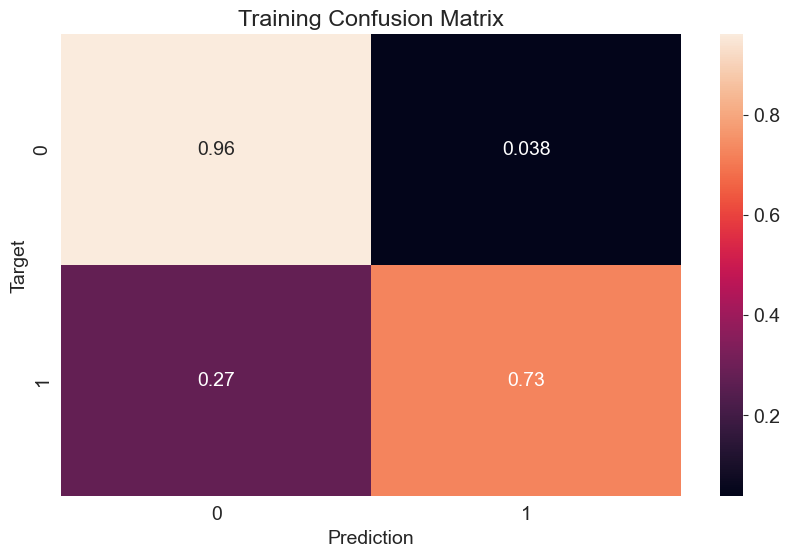

In [138]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 91.24%


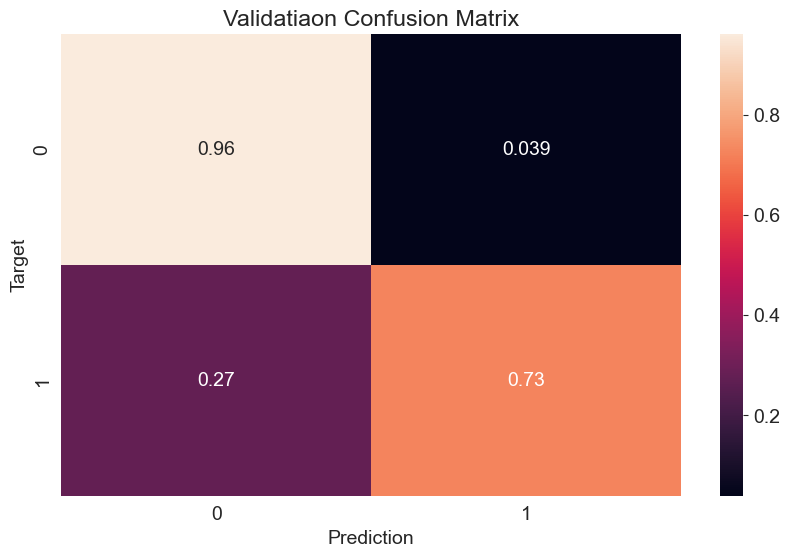

In [139]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 91.23%


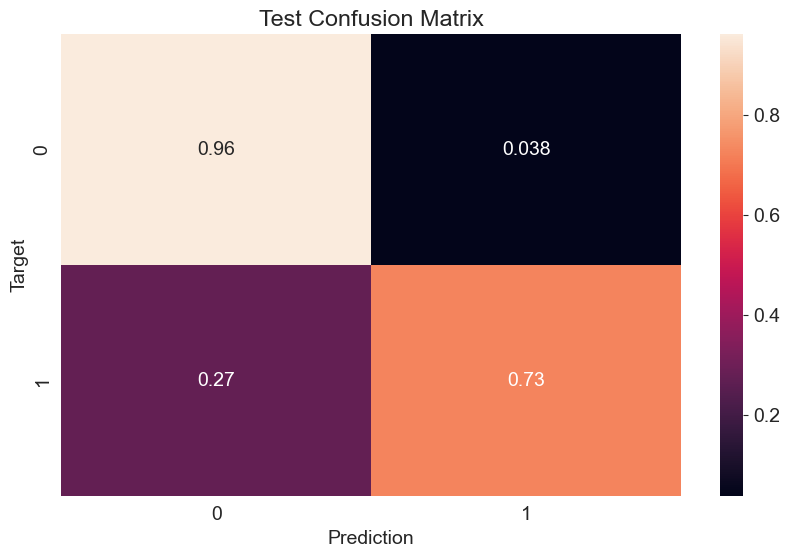

In [140]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [ ]:
#DECISION TREES - CLASSIFICATION

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
df.to_csv('Final_Columns.csv')

NameError: name 'df' is not defined

In [23]:
df1=pd.read_csv('Final_Columns.csv',index_col=[0])

In [24]:
df1

,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,ArrDel15,...,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,humidity
0,2016,1,SEA,JFK,1,741.0,0.0,745,0.0,0.0,...,107,113,0.0,10,1030,0,23,8,34,66
1,2016,1,SEA,JFK,2,737.0,0.0,745,0.0,0.0,...,119,113,0.0,10,1024,0,24,8,36,64
2,2016,1,SEA,JFK,3,743.0,0.0,745,0.0,0.0,...,85,113,0.0,10,1018,0,20,7,32,62
3,2016,1,SEA,JFK,4,737.0,0.0,745,0.0,0.0,...,9,143,0.2,3,1010,97,32,8,34,95
4,2016,1,SEA,JFK,5,708.0,0.0,710,0.0,0.0,...,62,266,0.1,6,1001,100,35,10,38,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840269,2017,9,SFO,JFK,25,2038.0,0.0,2045,0.0,0.0,...,288,113,0.0,10,1011,8,61,20,71,71
1840270,2017,9,EWR,MCO,25,1200.0,0.0,1205,0.0,0.0,...,88,113,0.0,10,1017,8,68,8,83,60
1840271,2017,9,MCO,EWR,25,1143.0,0.0,1141,2.0,0.0,...,343,113,0.0,10,1012,19,74,10,82,77
1840272,2017,9,LAS,JFK,25,2157.0,0.0,2159,0.0,0.0,...,301,113,0.0,10,1011,1,27,19,64,24


In [25]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df1["Origin"] = labelEncoder.fit_transform(df1["Origin"])
df1["Dest"] = labelEncoder.fit_transform(df1["Dest"])

In [26]:
X = df1.drop('ArrDel15', axis = 1)
y = df1['ArrDel15']

In [27]:
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1840269    0.0
1840270    0.0
1840271    0.0
1840272    0.0
1840273    0.0
Name: ArrDel15, Length: 1840274, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf1 = DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=12)

In [32]:
dtree=clf1.predict(X_test)

In [34]:
print(confusion_matrix(y_test, dtree))
print(round(accuracy_score(y_test, dtree),2)*100)
dtree_acc = round(accuracy_score(y_test, dtree),2)

report = classification_report(y_test, dtree, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[426491  10070]
 [ 36583  78939]]
92.0
              precision    recall  f1-score        support
0.0            0.921000  0.976933  0.948142  436561.000000
1.0            0.886865  0.683324  0.771903  115522.000000
accuracy       0.915496  0.915496  0.915496       0.915496
macro avg      0.903933  0.830129  0.860022  552083.000000
weighted avg   0.913857  0.915496  0.911265  552083.000000


In [47]:
#RANDOM FOREST CLASSIFIER


In [40]:
clf = RandomForestClassifier(n_jobs = -1)
clf.fit(X_train,y_train)
#print('Accuracy of Random Forest Classifier on training data: {:.2f}'.format(clf.score(X_train,y_train)))
#print('Accuracy of Random Forest Classifier on testing data: {:.2f}'.format(clf.score(X_test,y_test)))
model = clf
prediction = model.predict(X_test)
#cnf_matrix = confusion_matrix(y_test, prediction)
#plt.show()
#plot_learning_curve(model, 'Learning Curve For RF', X_train, y_train, (0.80,1.1), 10)
#plt.show()
#plot_confusion_matrix(cnf_matrix, classes=dict_characters,title='Confusion matrix')
#plt.show()

In [41]:
print(confusion_matrix(y_test, prediction ))
print(round(accuracy_score(y_test, prediction),2)*100)
rfc_acc = round(accuracy_score(y_test, prediction),2)

report = classification_report(y_test, prediction, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[425764  11082]
 [ 34584  80653]]
92.0
              precision    recall  f1-score        support
0.0            0.924874  0.974632  0.949101  436846.000000
1.0            0.879196  0.699888  0.779361  115237.000000
accuracy       0.917284  0.917284  0.917284       0.917284
macro avg      0.902035  0.837260  0.864231  552083.000000
weighted avg   0.915340  0.917284  0.913671  552083.000000


In [38]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

DepDelayMinutes    0.391590
DepDel15           0.190884
DepTime            0.054606
CRSDepTime         0.048105
winddirDegree      0.032990
Dest               0.030153
humidity           0.027644
tempF              0.026995
DewPointF          0.025508
DayofMonth         0.024148
WindGustKmph       0.023270
pressure           0.022002
windspeedKmph      0.021313
cloudcover         0.019812
Month              0.014690
Origin             0.014207
weatherCode        0.011572
precipMM           0.009960
visibility         0.006046
Year               0.004504
dtype: float64

In [66]:
#XGBOOST(Extreme Gradient Boosting)

In [69]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.8 MB/s eta 0:00:55
   ---------------------------------------- 0.5/99.8 MB 5.7 MB/s eta 0:00:18
   ---------------------------------------- 1.2/99.8 MB 8.6 MB/s eta 0:00:12
    --------------------------------------- 1.9/99.8 MB 10.0 MB/s eta 0:00:10
   - -------------------------------------- 2.8/99.8 MB 12.9 MB/s eta 0:00:08
   - -------------------------------------- 3.8/99.8 MB 14.1 MB/s eta 0:00:07
   - -------------------------------------- 4.6/99.8 MB 14.6 MB/s eta 0:00:07
   -- ------------------------------------- 5.7/99.8 MB 16.5 MB/s eta 0:00:06
   -- ------------------------------------- 7.0/99.8 MB 17.8 MB/s eta 0:00:06
   --- ------------------------------------ 8.0/99.8 MB 18.4 MB/s eta 0:00:05
   --- ------------------------------------ 9.1/99.8 MB 18.7 MB/s eta 0:00:05
   --

In [29]:
from xgboost import XGBClassifier

In [30]:
my_model = XGBClassifier()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 0.08031401075562913


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.9196859892443708

In [35]:
report = classification_report(y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

              precision    recall  f1-score        support
0.0            0.923807  0.979267  0.950729  436846.000000
1.0            0.898249  0.693822  0.782911  115237.000000
accuracy       0.919686  0.919686  0.919686       0.919686
macro avg      0.911028  0.836545  0.866820  552083.000000
weighted avg   0.918472  0.919686  0.915700  552083.000000


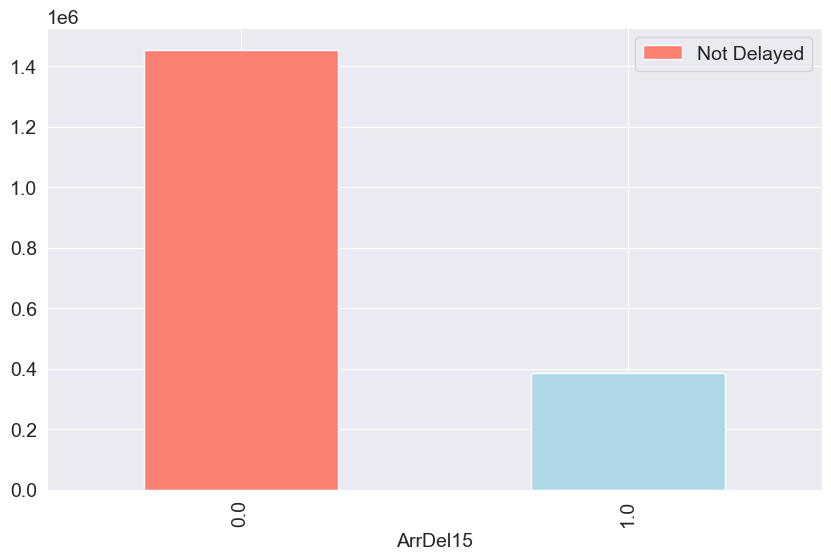

In [39]:
plt.figure(figsize = (10, 6))
df1['ArrDel15'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])
plt.legend(['Not Delayed', 'Delayed']);

In [52]:
count_class_0, count_class_1 = df1.ArrDel15.value_counts()

# Divide by class
df_class_0 = df1[df1['ArrDel15'] == 0]
df_class_1 = df1[df1['ArrDel15'] == 1]

In [65]:
df_class_1

,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,ArrDel15,...,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,humidity
9,2016,1,13,6,10,711.0,0.0,710,1.0,1.0,...,112,122,0.0,10,1024,87,35,9,37,78
13,2016,1,13,6,14,737.0,1.0,645,52.0,1.0,...,176,116,0.1,10,1017,66,37,21,40,90
15,2016,1,13,6,17,728.0,1.0,645,43.0,1.0,...,128,266,0.4,5,1009,100,38,28,44,80
20,2016,1,13,6,22,1229.0,1.0,645,344.0,1.0,...,172,353,1.5,9,1004,100,41,32,46,85
28,2016,1,6,13,2,1929.0,1.0,1825,64.0,1.0,...,244,113,0.0,10,1015,0,29,25,38,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840202,2017,9,6,8,24,2301.0,1.0,2143,78.0,1.0,...,192,113,0.0,10,1017,21,68,12,72,85
1840207,2017,9,4,9,24,1640.0,1.0,1034,366.0,1.0,...,173,113,0.0,10,1018,0,65,11,81,60
1840212,2017,9,7,14,24,1508.0,0.0,1503,5.0,1.0,...,25,113,0.0,10,1012,0,26,10,72,18
1840251,2017,9,8,6,25,1410.0,0.0,1410,0.0,1.0,...,217,116,0.0,10,1009,7,54,19,80,42


RANDOM OVER SAMPLING 

Random under-sampling:
ArrDel15
0.0    385719
1.0    385719
Name: count, dtype: int64


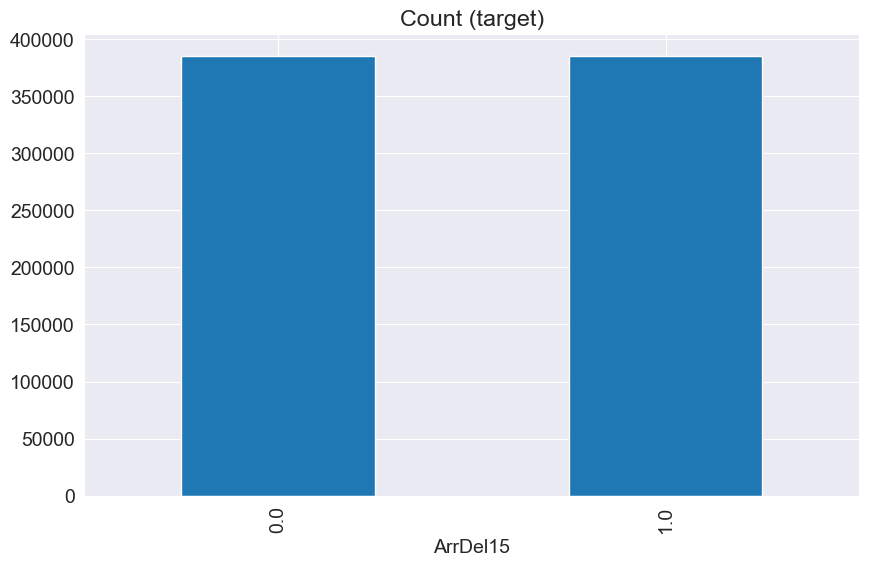

In [54]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.ArrDel15.value_counts())

df_test_under.ArrDel15.value_counts().plot(kind='bar', title='Count (target)');

RAW OVER SAMPLING of data-SMOTE(Synthetic Minority Over Sampling Technique)

In [79]:
ros = SMOTE(sampling_strategy='minority')
X_oversampled, y_oversampled = ros.fit_resample(X, y)

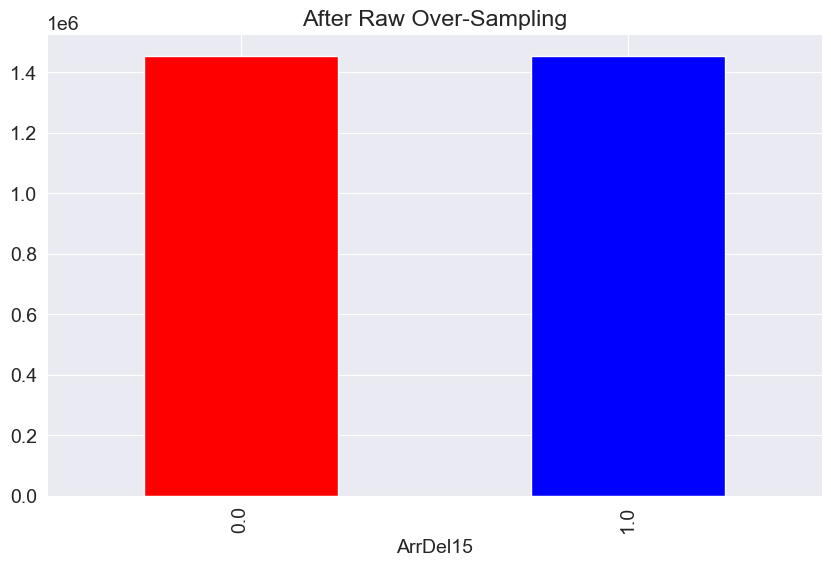

In [118]:
plt.figure(figsize = (10, 6))
y_oversampled.value_counts().plot(kind = 'bar', color = ['red', 'blue'])
plt.title('After Raw Over-Sampling');

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size = 0.3)

LOGISTIC REGRESSION ON OVER SAMPLED DATA

In [87]:
log_reg = LogisticRegression(solver='liblinear', random_state=0)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)



In [88]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

              precision    recall  f1-score        support
0.0            0.809044  0.924843  0.863076  436034.000000
1.0            0.912445  0.782044  0.842227  436699.000000
accuracy       0.853389  0.853389  0.853389       0.853389
macro avg      0.860744  0.853444  0.852652  872733.000000
weighted avg   0.860784  0.853389  0.852644  872733.000000


DECISION TREE CLASSIFIER ON OVER SAMPLED DATA

In [91]:
clf1 = DecisionTreeClassifier(criterion='gini')
clf1.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
dtree=clf1.predict(X_test)

In [93]:
print(confusion_matrix(y_test, dtree))
print(round(accuracy_score(y_test, dtree),2)*100)
dtree_acc = round(accuracy_score(y_test, dtree),2)

report = classification_report(y_test, dtree, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[390876  45158]
 [ 41390 395309]]
90.0
              precision    recall  f1-score        support
0.0            0.904249  0.896435  0.900325  436034.000000
1.0            0.897477  0.905221  0.901332  436699.000000
accuracy       0.900831  0.900831  0.900831       0.900831
macro avg      0.900863  0.900828  0.900829  872733.000000
weighted avg   0.900860  0.900831  0.900829  872733.000000


In [94]:
rfc = RandomForestClassifier(n_jobs = -1)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
rfc_acc = round(accuracy_score(y_test, rfcpred),2)

report = classification_report(y_test, rfcpred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[415231  20803]
 [ 40365 396334]]
93.0
              precision    recall  f1-score        support
0.0            0.911402  0.952290  0.931398  436034.000000
1.0            0.950129  0.907568  0.928361  436699.000000
accuracy       0.929912  0.929912  0.929912       0.929912
macro avg      0.930765  0.929929  0.929879  872733.000000
weighted avg   0.930780  0.929912  0.929878  872733.000000


In [97]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
xgb_acc = round(accuracy_score(y_test, xgbprd),2)

report = classification_report(y_test, xgbprd, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[420272  15762]
 [ 57013 379686]]
92.0
              precision    recall  f1-score        support
0.0            0.880547  0.963851  0.920318  436034.000000
1.0            0.960141  0.869446  0.912545  436699.000000
accuracy       0.916613  0.916613  0.916613       0.916613
macro avg      0.920344  0.916648  0.916432  872733.000000
weighted avg   0.920375  0.916613  0.916429  872733.000000


RAW UNDER SAMPLING BY ClusterCentroids

In [132]:
ros = RandomUnderSampler(random_state=0)
X_unsampled, y_unsampled = ros.fit_resample(X, y)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_unsampled, y_unsampled, test_size = 0.3)

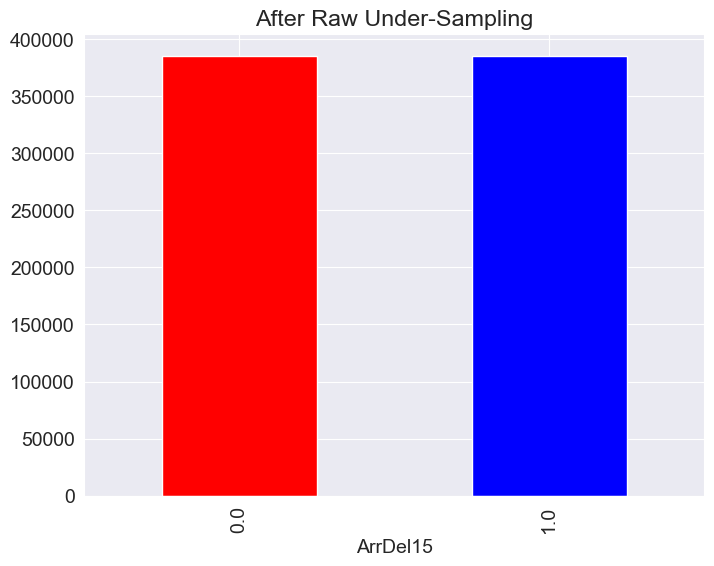

In [140]:
plt.figure(figsize = (8, 6))
y_unsampled.value_counts().plot(kind = 'bar', color = ['red', 'blue'])
plt.title('After Raw Under-Sampling');

Logistic Rgression on Under sampled data

In [134]:
log_reg = LogisticRegression(solver='liblinear', random_state=0)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [135]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

              precision    recall  f1-score        support
0.0            0.805941  0.925848  0.861744  115601.000000
1.0            0.913091  0.777512  0.839865  115831.000000
accuracy       0.851607  0.851607  0.851607       0.851607
macro avg      0.859516  0.851680  0.850804  231432.000000
weighted avg   0.859569  0.851607  0.850794  231432.000000


In [137]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
xgb_acc = round(accuracy_score(y_test, xgbprd),2)

report = classification_report(y_test, xgbprd, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[106522   9079]
 [ 23361  92470]]
86.0
              precision    recall  f1-score        support
0.0            0.820138  0.921463  0.867853  115601.000000
1.0            0.910595  0.798318  0.850768  115831.000000
accuracy       0.859829  0.859829  0.859829       0.859829
macro avg      0.865367  0.859890  0.859311  231432.000000
weighted avg   0.865411  0.859829  0.859302  231432.000000


In [138]:
rfc = RandomForestClassifier(n_jobs = -1)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
rfc_acc = round(accuracy_score(y_test, rfcpred),2)

report = classification_report(y_test, rfcpred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[105257  10344]
 [ 22424  93407]]
86.0
              precision    recall  f1-score        support
0.0            0.824375  0.910520  0.865309  115601.000000
1.0            0.900300  0.806408  0.850771  115831.000000
accuracy       0.858412  0.858412  0.858412       0.858412
macro avg      0.862337  0.858464  0.858040  231432.000000
weighted avg   0.862375  0.858412  0.858033  231432.000000


In [145]:
clf1 = DecisionTreeClassifier(criterion='gini')
clf1.fit(X_train, y_train)
dtree=clf1.predict(X_test)

In [146]:
print(confusion_matrix(y_test, dtree))
print(round(accuracy_score(y_test, dtree),2)*100)
dtree_acc = round(accuracy_score(y_test, dtree),2)

report = classification_report(y_test, dtree, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[91131 24470]
 [23209 92622]]
79.0
              precision    recall  f1-score        support
0.0            0.797018  0.788324  0.792647  115601.000000
1.0            0.791019  0.799630  0.795301  115831.000000
accuracy       0.793983  0.793983  0.793983       0.793983
macro avg      0.794018  0.793977  0.793974  231432.000000
weighted avg   0.794015  0.793983  0.793975  231432.000000


In [1]:
import pickle as pkl

In [42]:

pkl.dump(clf, open('rf_clasf.pkl', 'wb'))